16
[(0, 7), (7, 8), (8, 5), (5, 9), (9, 6), (6, 5), (5, 4), (4, 3), (3, 5), (5, 7), (7, 3), (3, 1), (1, 4), (4, 2), (2, 1), (1, 0)]


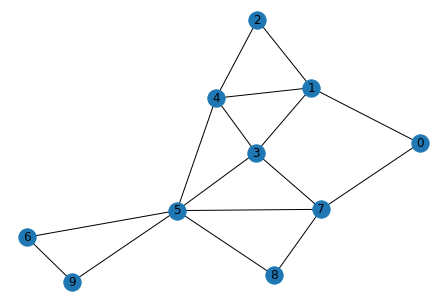

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import random

G = nx.Graph()

G.add_edge(0, 1)
G.add_edge(0, 7)

G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(1, 4)

G.add_edge(2, 4)

G.add_edge(3, 4)
G.add_edge(3, 5)
G.add_edge(3, 7)

G.add_edge(4, 5)

G.add_edge(5, 6)
G.add_edge(5, 9)
G.add_edge(5, 8)
G.add_edge(5, 7)

G.add_edge(6, 9)

G.add_edge(7, 8)

eul = list(nx.eulerian_circuit(G))
print(len(eul))
print(eul)

nx.draw(G, with_labels = True)
plt.show()

In [6]:
G = nx.Graph()

G.add_edge(0, 1)
G.add_edge(0, 7)
G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(1, 4)
G.add_edge(2, 4)
G.add_edge(3, 4)
G.add_edge(3, 5)
G.add_edge(3, 7)
G.add_edge(4, 5)
G.add_edge(5, 6)
G.add_edge(5, 9)
G.add_edge(5, 8)
G.add_edge(5, 7)
G.add_edge(6, 9)
G.add_edge(7, 8)


def eulerian_circuit(G: nx.Graph):
    F = list(G.edges())
    v = random.choice(list(G.nodes()))
    K = list(G.edges(v))
    e = random.choice(K)

    while len(F) > 0:
        (left, right) = e
        print(
            'v=' + str(v),
            'F=' + str(F),
            'e=' + str((left, right)),
            'K=' + str(K),
            sep='; '
          )

        # Remove Edge from Graph
        G.remove_edge(left, right)

        F = list(G.edges())

        # go to next node
        v = right

        # Add edges from v
        local_edges = list(G.edges(v))
        for (first, second) in local_edges:
            if not (first,second) in K and not (second, first) in K:
                K.append((first, second))

        # Choose random edge, which is not a bridge
        # If there is only one edge, we don't care if its a bridge
        if len(local_edges) == 1:
            e = local_edges[0]
        elif len(local_edges) == 0:
            continue
        else:
            # Choose an edge, which is not a bridge
            e = random.choice(local_edges)
            while e in list(nx.bridges(G)):
                e = random.choice(local_edges)
    return K

own_eul = eulerian_circuit(G)
print(len(own_eul))
print(own_eul)

for (left, right) in own_eul:
    if not (left,right) in eul and not (right, left) in eul:
        print("Not the same")
        break


v=8; F=[(0, 1), (0, 7), (1, 2), (1, 3), (1, 4), (7, 3), (7, 5), (7, 8), (2, 4), (3, 4), (3, 5), (4, 5), (5, 6), (5, 9), (5, 8), (6, 9)]; e=(8, 5); K=[(8, 5), (8, 7)]
v=5; F=[(0, 1), (0, 7), (1, 2), (1, 3), (1, 4), (7, 3), (7, 5), (7, 8), (2, 4), (3, 4), (3, 5), (4, 5), (5, 6), (5, 9), (6, 9)]; e=(5, 7); K=[(8, 5), (8, 7), (5, 3), (5, 4), (5, 6), (5, 9), (5, 7)]
v=7; F=[(0, 1), (0, 7), (1, 2), (1, 3), (1, 4), (7, 3), (7, 8), (2, 4), (3, 4), (3, 5), (4, 5), (5, 6), (5, 9), (6, 9)]; e=(7, 0); K=[(8, 5), (8, 7), (5, 3), (5, 4), (5, 6), (5, 9), (5, 7), (7, 0), (7, 3)]
v=0; F=[(0, 1), (1, 2), (1, 3), (1, 4), (7, 3), (7, 8), (2, 4), (3, 4), (3, 5), (4, 5), (5, 6), (5, 9), (6, 9)]; e=(0, 1); K=[(8, 5), (8, 7), (5, 3), (5, 4), (5, 6), (5, 9), (5, 7), (7, 0), (7, 3), (0, 1)]
v=1; F=[(1, 2), (1, 3), (1, 4), (7, 3), (7, 8), (2, 4), (3, 4), (3, 5), (4, 5), (5, 6), (5, 9), (6, 9)]; e=(1, 2); K=[(8, 5), (8, 7), (5, 3), (5, 4), (5, 6), (5, 9), (5, 7), (7, 0), (7, 3), (0, 1), (1, 2), (1, 3), (1, 4)]
v=

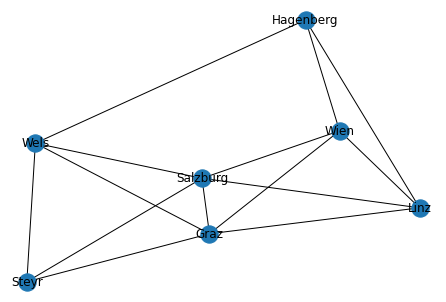

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_weighted_edges_from([
    ("Wien", "Linz",184.4),
    ("Wien", "Hagenberg",180),
    ("Wien", "Graz",200.1),
    ("Wien", "Salzburg",295),
    ("Linz", "Hagenberg",23),
    ("Linz", "Graz",220.9),
    ("Linz", "Salzburg",132.5),
    ("Salzburg", "Steyr",134),
    ("Salzburg", "Graz",296),
    ("Salzburg", "Wels",108),
    ("Graz", "Steyr",191),
    ("Graz", "Wels",196),
    ("Wels", "Steyr",45.2),
    ("Wels", "Hagenberg",57.2)
])

nx.draw(G, with_labels = True)
plt.show()

def best_improvement_search(g: nx.Graph, start: str):
    nodes = list(g.nodes())
    swap2_graph = nx.Graph()
    cities = list()
    distance = 0
    curr = start
    while True:
        i = 0
        next = g.edges(curr)[i]
        while next[i] in cities:
            i += 1
            next = g.edges(curr)[i]
            # TODO
